The following does the MCMC draws as in the paper. The likelihood employed is in the bayesprob file

In [18]:
from bayesprob import *

In [19]:
def sampler(pie_s,f_a,f_lamda,f_n):
    #Starting values
    a_r=.5;n_r=2;lamda=0.5;a=0.5;n=2
    ll=llf(pie_s,lamda,n,a,n_r,a_r)
    proposal_draws=[]
    posterior_draws=[]


    rndu=uniform      #Distribution of uniform draws for the sampler
    for i in range(100000):  #this sets the number of draws for the sampler
        lamda_=float(f_lamda.rvs(1)[0])
        a_=float(f_a.rvs(1)[0])

        n_=float(f_n.rvs(1)[0])
        N_=n_*(1-lamda_)/lamda_

        ll_=llf(pie_s,lamda_,n_,a_,n_r,a_r)
        rat=np.exp(ll_-ll)
        x_=(n_+N_)*pie_s-n_*a_
        pie_r_=(a_r*n_r+x_)/(n_r+N_)
        if rat>float(rndu.rvs(size=1)[0]):
           a,n,lamda,ll,x,pie_r=a_,n_,lamda_,ll_,x_,pie_r_
           N=n*(1-lamda)/lamda
        proposal_draws+=[[a_,n_,lamda_,np.log(N_)]]    
        posterior_draws+=[[a,n,lamda,np.log(N),pie_r,ll]]

    proposal_draws=frame(proposal_draws) 
    posterior_draws=frame(posterior_draws) 
    posterior_draws=posterior_draws.iloc[1000:] #Remove the first 1000, as a burn in

    posterior_draws.columns=symbols4

    symbols5=[]
    for i in symbols4:
        symbols5+=[i[:-1]+'_{p}'+'$']

    proposal_draws.columns=symbols5[:4]
    return proposal_draws,posterior_draws

def graph_dist(pie_s,proposal_draws,posterior_draws):
    c=proposal_draws.columns
    pltsize(3,15)
    fig,ax=plt.subplots(1,5,sharex=False)
    fig.suptitle('The priors and posteriors under stated probability='+ str(pie_s))
    proposal_draws[[c[0]]].plot(kind='hist',ax=ax[0],bins=100,grid=True,alpha=0.25)
    proposal_draws[[c[1]]].plot(kind='hist',ax=ax[1],bins=100,grid=True,alpha=0.25)
    proposal_draws[[c[2]]].plot(kind='hist',ax=ax[2],bins=100,grid=True,alpha=0.25)
    proposal_draws[[c[3]]].plot(kind='hist',ax=ax[3],bins=100,grid=True,alpha=0.25)
    #x[0,4].remove()

    c=posterior_draws.columns
    posterior_draws[[c[0]]].plot(kind='hist',ax=ax[0],bins=100,grid=True,alpha=0.5)
    posterior_draws[[c[1]]].plot(kind='hist',ax=ax[1],bins=100,grid=True,alpha=0.5)
    posterior_draws[[c[2]]].plot(kind='hist',ax=ax[2],bins=100,grid=True,alpha=0.5)
    posterior_draws[[c[3]]].plot(kind='hist',ax=ax[3],bins=100,grid=True,alpha=0.5)
    posterior_draws[[c[4]]].plot(kind='hist',ax=ax[4],bins=100,grid=True,alpha=0.5)

Set the priors (which are also used as proposal distributions for the sampler) along with the stated probability

In [20]:
f_lamda=beta(1,1)                       #The prior distribution for lamda=n/(n+N) (also the proposal distribution)
f_a=beta(1,1)                           #The prior distribution for a              (also the proposal distribution)
min_n=2                                 #The minimum n for the distribution
f_n=gamma(a=1,scale=1,loc=min_n)        #The prior and proposal distribution for n
pie_s=0.9                               #The stated probability

Run the sampler

In [21]:
proposal_draws,posterior_draws=sampler(pie_s,f_a,f_lamda,f_n)

C:\Users\aes05kgb\AppData\Local\Temp\ipykernel_14708\1136251169.py:18: RuntimeWarning: overflow encountered in exp
  rat=np.exp(ll_-ll)


# The summary of the simulated distributions are below

In [22]:
proposal_draws.describe().round(4)

,$a_{p}$,$n_{p}$,$λ_{p}$,$lnN_{p}$
count,100000.0000,100000.0000,100000.0000,100000.0000
mean,0.5003,3.0037,0.4991,1.0618
std,0.2880,1.0019,0.2884,1.8306
min,0.0000,2.0000,0.0000,-12.2523
25%,0.2499,2.2894,0.2492,-0.0538
50%,0.5002,2.6935,0.4980,1.0625
75%,0.7494,3.3960,0.7479,2.1775
max,1.0000,17.9436,1.0000,13.1288


In [23]:
posterior_draws.describe()

,$a$,$n$,$λ$,$lnN$,$π_{r}$,loglik
count,99000.000000,99000.000000,99000.000000,99000.000000,99000.000000,99000.000000
mean,0.744028,3.060612,0.343210,2.072948,0.792509,0.288948
std,0.248373,1.042882,0.281313,1.799123,0.134532,0.290149
min,0.000091,2.000043,0.000031,-4.551151,0.389660,0.000025
25%,0.626832,2.310118,0.100121,0.821998,0.702446,0.065349
50%,0.845377,2.745881,0.255977,2.128129,0.846354,0.176105
75%,0.927401,3.479339,0.563428,3.271225,0.899821,0.440772
max,0.999979,14.306420,0.995367,12.091963,0.979798,1.781969


# Figure C1

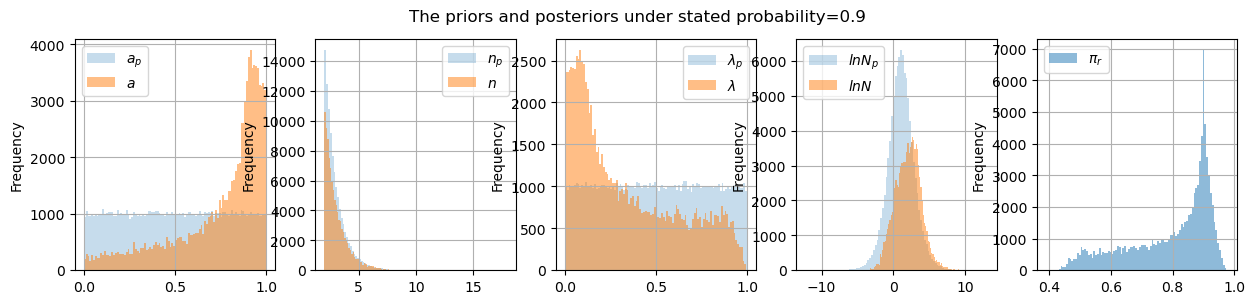

In [24]:
graph_dist(pie_s,proposal_draws,posterior_draws)
#plt.savefig(direcout+'FigC.1'+'.png',bbox_inches='tight')